# Final Project



### **Note:**
1. Please manually upload the image to the session storage on the left-hand side
2. All testing images are included in the submitted zip file

##1st step: Read Image and Verification


*   Making sure importing the image and open it successfully
*   Print out the channel information and verify the RGB value

In [ ]:
import sys 
import os
import cv2 # imports OpenCV
import numpy as np
from matplotlib import pyplot as plt #imports matplotlib
print('-'*100)
print ('Python version: {}'.format(sys.version))
print('OpenCV version: {}'.format(cv2.__version__))

----------------------------------------------------------------------------------------------------
Python version: 3.12.4 (v3.12.4:8e8a4baf65, Jun  6 2024, 17:33:18) [Clang 13.0.0 (clang-1300.0.29.30)]
OpenCV version: 4.12.0


[[ 0  0  2]
 [ 1  1  3]
 [ 1  1  3]
 ...
 [16  1  8]
 [16  1  8]
 [15  0  7]]


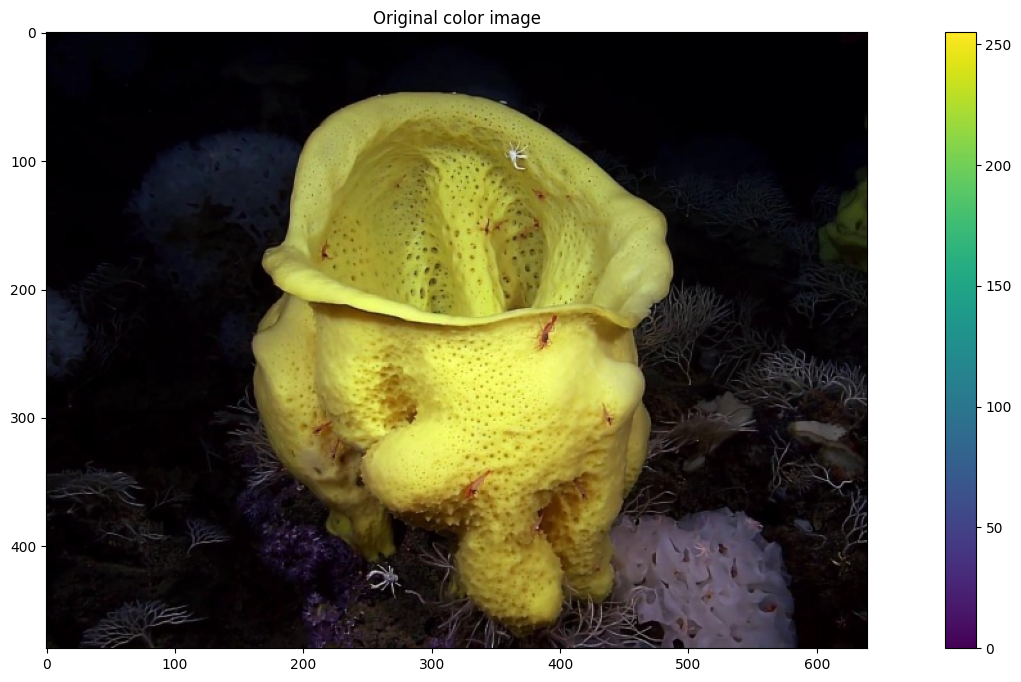

In [ ]:
#plotting function
#This is a provided from previous assignment
def pltImg(img, title=None, ori="horizontal", colorb = True):  
    plt.imshow(img)
    if colorb:
        plt.colorbar(orientation=ori)
    if title:
        plt.title(title)
    return plt

img = cv2.imread('./data/sample-1.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (20,8))
plt = pltImg(img2,title="Original color image", ori='vertical')

#printout the partial channel information
print(img2[0])

##2nd step: Image Inversion and Grayscale
* The inverted image is required before process the CCI
* Turn inverted image to grayscale in order to be used later

[255 255 255 255 254 254 254 254 254 254 254 254 254 254 253 252 253 253
 254 254 254 254 254 254 255 255 255 255 255 255 255 255 255 254 254 254
 255 255 254 254 254 254 254 254 255 255 255 255 255 255 255 255 255 255
 255 255 254 254 254 254 254 254 254 254 255 255 255 255 255 255 255 255
 254 254 254 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 253 253 253 253 253 253 253 253 255 255 255 255 255 255
 255 255 253 253 253 253 252 252 252 252 253 252 252 252 251 251 252 253
 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253 250 250 250 250 251 248
 242 236 237 230 229 231 230 226 225 222 221 220 222 225 226 221 223 221
 220 220 220 220 221 222 224 225 223 226 225 223 220 216 214 221 226 229
 232 232 230 228 229 240 236 227 229 232 230 231 23

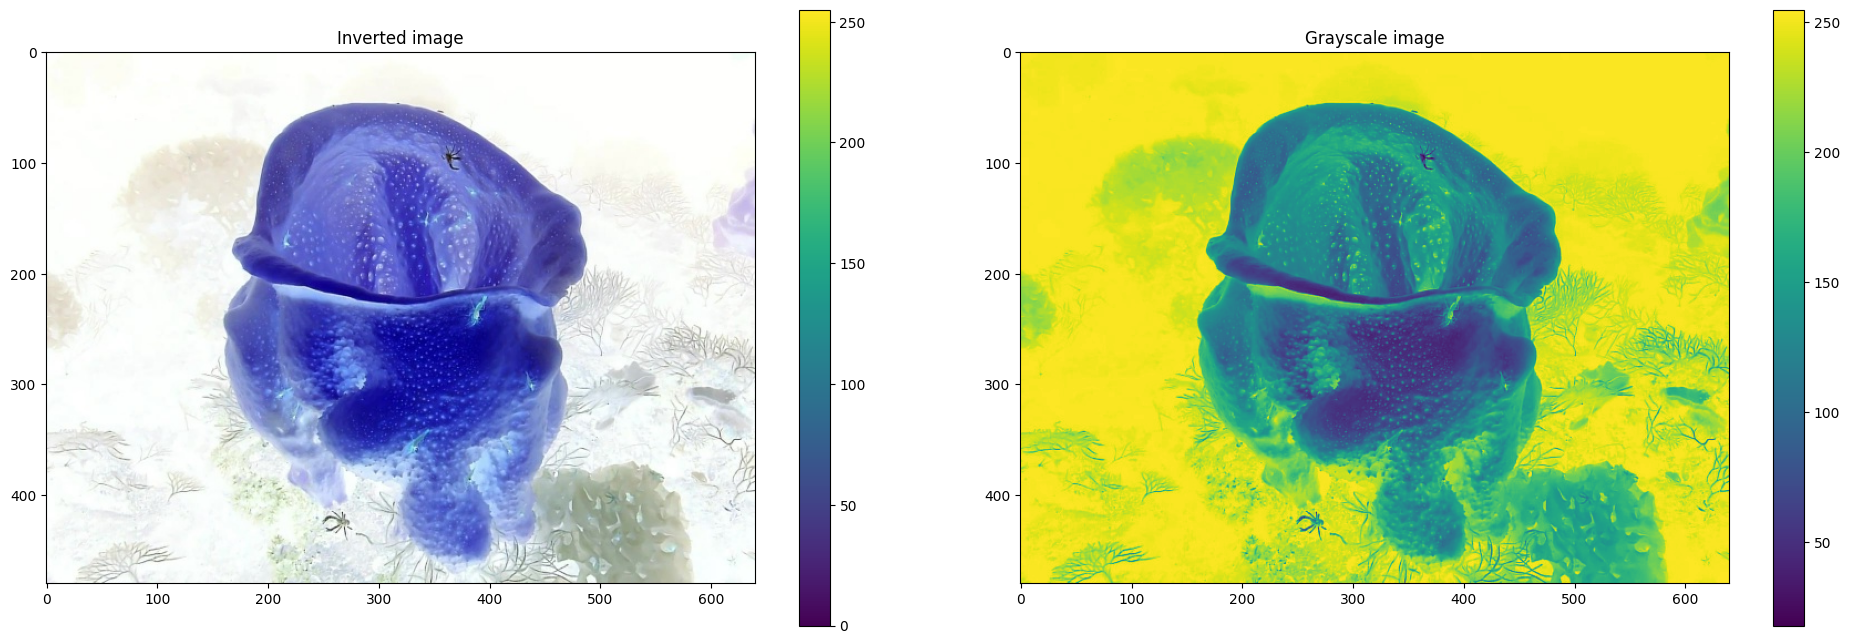

In [8]:
#perform inversion with bitwise operation
inverted= cv2.bitwise_not(img2)
gray = cv2.cvtColor(inverted, cv2.COLOR_BGR2GRAY)
#printout the partial channel information
#confirm the channel is inverted
print(inverted[:,0,0])

plt.figure(figsize = (24,8))
plt.subplot(1, 2, 1)
plt = pltImg(inverted,title="Inverted image", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(gray,title="Grayscale image", ori='vertical')
plt.subplots_adjust(wspace=0.1)

##3rd Step: Compute the Contrast Code Image (CCI)##
### **Note:** ###
The algorithm is based on the article "A Contrast-Guided Approach for the Enhancement of Low-Lighting Underwater Images" By Tunai Porto Marques, Alexandra Branzan Albu, and Maia Hoeberechts

* Needs to find local standard deviation with dynamic patch size
* Needs to consider the tolerance array according to the given tolerance value as 3

The detail algorithm is listed below:

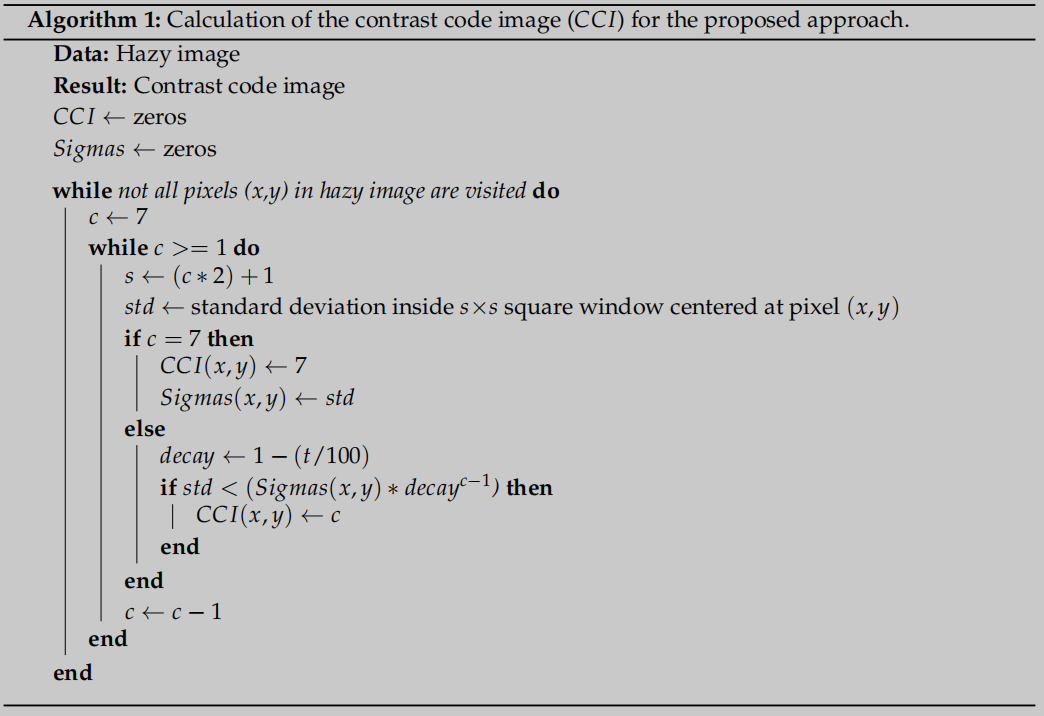

In [9]:
psize = [15, 13, 11, 9, 7, 5, 3]
x1, y1 = gray.shape
score_temp = np.zeros((x1,y1,7))
def local_std(img,p_size):
    # Convert the image to float64 format
    img = np.float64(img)
    for i in range(7):
        
        # Define the patch size
        patch_size = (p_size[i], p_size[i])
        
        # Calculate the local mean of the image using a box filter
        local_mean = cv2.boxFilter(img, -1, patch_size)
        
        # Calculate the local variance of the image using a box filter
        local_variance = cv2.boxFilter(img**2, -1, patch_size) - local_mean**2
        
        # Calculate the local standard deviation of the image
        local_std_deviation = np.sqrt(local_variance)
        score_temp[:,:,i] = local_std_deviation

    return score_temp


score_temp = local_std(gray,psize)
# print(score_temp[0,:,0])
print(score_temp)


[[[7.05533683e-01 6.43203704e-01 6.93525829e-01 ... 4.94871659e-01
   4.00000000e-01 4.71404521e-01]
  [7.06149356e-01 7.06053792e-01 6.93525829e-01 ... 7.28431359e-01
   4.89897949e-01 4.71404521e-01]
  [7.60688447e-01 7.59934726e-01 6.93525829e-01 ... 6.99854212e-01
   7.48331477e-01 4.71404521e-01]
  ...
  [1.24046984e+00 1.18493987e+00 9.80723992e-01 ... 7.55928946e-01
   7.75628777e-01 4.96903995e-01]
  [1.21282040e+00 1.09957324e+00 9.08940634e-01 ... 8.35489367e-01
   7.83836718e-01 4.96903995e-01]
  [1.18509259e+00 1.04064657e+00 8.93479785e-01 ... 8.55197014e-01
   8.44748483e-01 4.15739710e-01]]

 [[7.05533683e-01 6.43203704e-01 6.93525829e-01 ... 4.82082115e-01
   4.00000000e-01 4.71404521e-01]
  [7.06149356e-01 7.06053792e-01 6.93525829e-01 ... 7.03415834e-01
   4.89897949e-01 4.71404521e-01]
  [7.72362098e-01 7.59934726e-01 6.93525829e-01 ... 6.94477532e-01
   7.48331477e-01 4.71404521e-01]
  ...
  [1.25758145e+00 1.19383006e+00 1.09040810e+00 ... 8.66325930e-01
   8.35224

In [10]:
tolerance = 3
x, y, z = inverted.shape
tol = 1-(tolerance/100)

# create the tolerance array
tolerance_array = [1*((tol)**6), 1*((tol)**5), 1*((tol)**4), 1*((tol)**3), 1*((tol)**2), 1*((tol)**1), 1]
tolerance_matrix = np.tile(tolerance_array,(x,y,1))
# print(tolerance_matrix[0,:,0])


multiplication = score_temp * tolerance_matrix
print("Multiplication result")
print(multiplication)
# print(multiplication[0,:,0])
# for i in range (7):
#     print(multiplication[0,0,i])
# print(multiplication)

Multiplication result
[[[5.87689806e-01 5.52340906e-01 6.13973430e-01 ... 4.65624744e-01
   3.88000000e-01 4.71404521e-01]
  [5.88202645e-01 6.06312415e-01 6.13973430e-01 ... 6.85381066e-01
   4.75201010e-01 4.71404521e-01]
  [6.33632181e-01 6.52581807e-01 6.13973430e-01 ... 6.58492828e-01
   7.25881533e-01 4.71404521e-01]
  ...
  [1.03327665e+00 1.01754818e+00 8.68227898e-01 ... 7.11253545e-01
   7.52359914e-01 4.96903995e-01]
  [1.01024544e+00 9.44240954e-01 8.04678608e-01 ... 7.86111945e-01
   7.60321616e-01 4.96903995e-01]
  [9.87148950e-01 8.93638615e-01 7.90991230e-01 ... 8.04654870e-01
   8.19406029e-01 4.15739710e-01]]

 [[5.87689806e-01 5.52340906e-01 6.13973430e-01 ... 4.53591062e-01
   3.88000000e-01 4.71404521e-01]
  [5.88202645e-01 6.06312415e-01 6.13973430e-01 ... 6.61843958e-01
   4.75201010e-01 4.71404521e-01]
  [6.43356005e-01 6.52581807e-01 6.13973430e-01 ... 6.53433910e-01
   7.25881533e-01 4.71404521e-01]
  ...
  [1.04753014e+00 1.02518249e+00 9.65330450e-01 ... 8.1

In [11]:
CCI = np.zeros((x,y))
for height in range(y):
    for width in range(x):
        # #init CCI value to 7
        # CCI[width][height] = 7

        #find the smallest std. dev.
        smallest_std_index = np.argmin(multiplication[width,height,:])
        # CCI[width][height] = c[smallest_std_index]
        CCI[width][height] = smallest_std_index+1
        #CCI[width][height] = psize[smallest_std_index]
print(CCI)

[[6. 7. 7. ... 7. 7. 7.]
 [6. 7. 7. ... 6. 7. 7.]
 [6. 6. 7. ... 7. 7. 7.]
 ...
 [7. 7. 7. ... 3. 2. 1.]
 [7. 7. 6. ... 3. 2. 1.]
 [7. 7. 6. ... 3. 2. 1.]]


##4th step: Finding its dark channel
* Finding the min value for all channels
* Creating dark channel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


[254. 254. 254. 254. 254. 254. 254. 254. 254. 254. 254. 254. 254. 252.
 252. 252. 252. 253. 253. 254. 254. 254. 254. 254. 254. 255. 255. 255.
 255. 255. 255. 255. 255. 254. 254. 254. 254. 255. 254. 254. 254. 254.
 254. 254. 254. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 254.
 254. 254. 254. 254. 254. 254. 254. 254. 254. 255. 255. 255. 255. 255.
 255. 254. 254. 254. 254. 254. 254. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 253.
 253. 253. 253. 253. 253. 253. 253. 253. 253. 253. 253. 253. 253. 253.
 253. 253. 253. 253. 253. 252. 252. 252. 252. 252. 252. 252. 252. 252.
 251. 251. 250. 252. 253. 253. 253. 253. 253. 253. 253. 253. 253. 253.
 253. 253. 253. 253. 253. 253. 253. 253. 253. 253. 253. 253. 253. 253.
 253. 253. 253. 253. 253. 253. 253. 253. 253. 253. 253. 253. 253. 253.
 253. 253. 253. 253. 253. 253. 253. 253. 253. 253. 250. 250. 250. 250.
 250. 

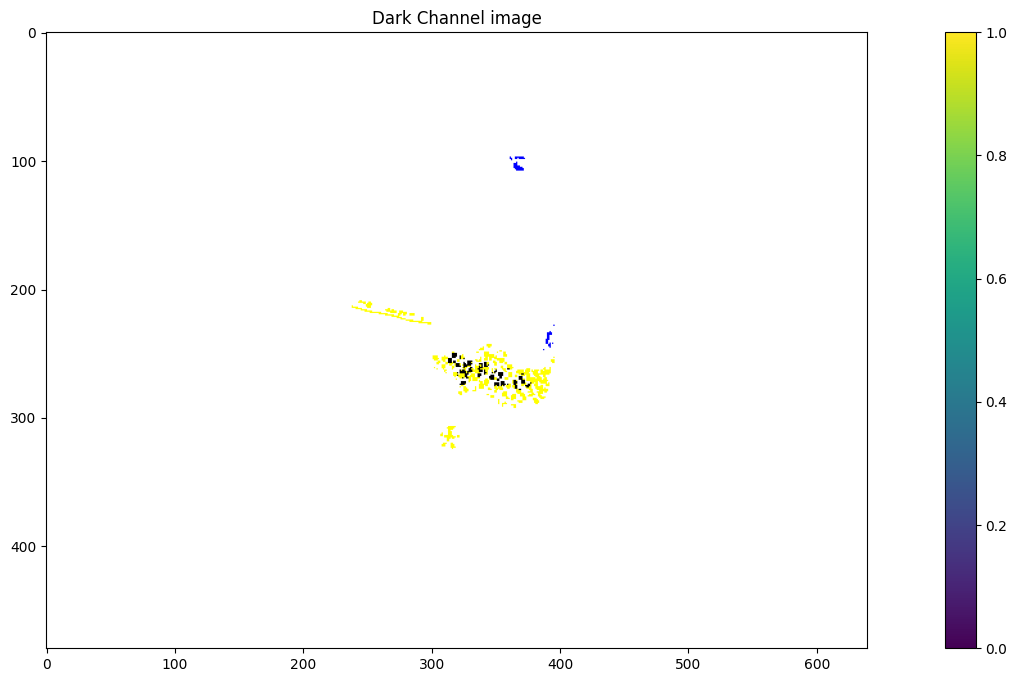

In [12]:
A = inverted.copy()
x, y, z = A.shape
# A[A<10]=0
dark_channel = np.zeros((x,y,3))
biggest_psize = 15
prange_biggest = round(biggest_psize/2)-1
extended = np.pad(A, pad_width=prange_biggest, mode='symmetric')

for i in range(x):
    for j in range(y):
        cpx = i+prange_biggest
        cpy = j+prange_biggest 
        prange = CCI[i,j]
        prange = round(8-prange)  
        patch = extended[(cpx-prange):(cpx+prange),(cpy-prange):(cpy+prange),:]

        dark_channel[i,j,0] = np.min(patch[:,:,0])
        dark_channel[i,j,1] = np.min(patch[:,:,1])
        dark_channel[i,j,2] = np.min(patch[:,:,2])
       
print(dark_channel[:,0,0])
print(dark_channel)
plt.figure(figsize = (20,8))
plt = pltImg(dark_channel,title="Dark Channel image", ori='vertical')

# def dark_channel(I):

#     temp_img = I.copy()
#     h, w, c = I.shape
#     dark_channel = np.zeros((h,w,3))
#     I[I<10]=0
#     biggest_psize = 15
#     prange_biggest = round(biggest_psize/2)-1

#     I_padding = np.ones(shape=(h+2*prange_biggest, w+2*prange_biggest,3))*0
#     I_padding[prange_biggest:(prange_biggest+h), prange_biggest:(prange_biggest+w),0] = I[:,:,0]
#     I_padding[prange_biggest:(prange_biggest+h), prange_biggest:(prange_biggest+w),1] = I[:,:,1]
#     I_padding[prange_biggest:(prange_biggest+h), prange_biggest:(prange_biggest+w),2] = I[:,:,2]

#     for i in range(h):
#         for j in range(w):
#             cpx = i+prange_biggest
#             cpy = j+prange_biggest 
#             prange = CCI[i,j]
#             prange = int(8-prange)  
#             patch = I_padding[(cpx-prange):(cpx+prange),(cpy-prange):(cpy+prange),:]
            # dark_channel[i,j,0] = np.min(np.min(patch[:,:,0]))
            # dark_channel[i,j,1] = np.min(np.min(patch[:,:,1]))
            # dark_channel[i,j,2] = np.min(np.min(patch[:,:,2]))
#             dark_channel[i,j,0] = np.min(patch[:,:,0])
#             dark_channel[i,j,1] = np.min(patch[:,:,1])
#             dark_channel[i,j,2] = np.min(patch[:,:,2])
    
#     return dark_channel

##5th step: Calculating Atm. Lighting Model
* Evaluating atm. lighting with two different patch sizes based on local contrast

In [13]:
multiplier = [5,30]

def contrastGuidedAL(dark_channel,CCI,multiplier):
    h, w= dark_channel.shape
    result = np.zeros((h,w))
    m = multiplier
    prange_biggest = round(15/2)-1
    extended = np.pad(dark_channel, pad_width=(prange_biggest*multiplier), mode='symmetric')

    upsilon = [3*m-((m/3)*(1-1)),3*m-((m/3)*(2-1)),3*m-((m/3)*(3-1)),3*m-((m/3)*(4-1)),3*m-((m/3)*(5-1)),3*m-((m/3)*(6-1)),3*m-((m/3)*(7-1))]
    upsilon = np.floor_divide(upsilon, 2)
    for i in range(h):
        for j in range(w):
            
            
            cpx=i+(prange_biggest*multiplier)
            cpy=j+(prange_biggest*multiplier)
            
            c = int(CCI[i,j])
            prange = int(upsilon[8-c-1])

            patch = extended[(cpx-prange):(cpx+prange),(cpy-prange):(cpy+prange)]
            
            result[i,j] = np.max(patch)

    return(result)

result = contrastGuidedAL(dark_channel[:,:,0],CCI,multiplier[0])
print(result)


# def contrastGuidedAL(dark_channel,CCI,multiplier):
#     h, w= dark_channel.shape
#     result = np.zeros((h,w))
#     m = multiplier
#     prange_biggest = round(15/2)-1
#     I_padding = np.ones(shape=(h+2*prange_biggest*multiplier, w+2*prange_biggest*multiplier))*0
#     I_padding[(prange_biggest*multiplier):(prange_biggest*multiplier+h), (prange_biggest*multiplier):(prange_biggest*multiplier+w)] = dark_channel
#     upsilon = [3*m-((m/3)*(1-1)),3*m-((m/3)*(2-1)),3*m-((m/3)*(3-1)),3*m-((m/3)*(4-1)),3*m-((m/3)*(5-1)),3*m-((m/3)*(6-1)),3*m-((m/3)*(7-1))]
#     upsilon = np.floor_divide(upsilon, 2)
#     for i in range(h):
#         for j in range(w):
            
            
#             cpx=i+(prange_biggest*multiplier)
#             cpy=j+(prange_biggest*multiplier)
            
#             c = int(CCI[i,j])
#             prange = int(upsilon[8-c-1])

#             patch = I_padding[(cpx-prange):(cpx+prange),(cpy-prange):(cpy+prange)]
            
#             result[i,j] = np.max(patch)

#     return(result)

# result = contrastGuidedAL(dark_channel[:,:,0],CCI,multiplier[0])
# print(result)

[[255. 255. 255. ... 250. 250. 250.]
 [255. 255. 255. ... 250. 253. 253.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [250. 252. 253. ... 251. 251. 251.]
 [250. 250. 250. ... 251. 251. 251.]
 [249. 250. 250. ... 251. 251. 251.]]


In [14]:
ah, aw, ac = dark_channel.shape
atmLightImage_m5 = np.zeros((ah,aw,3))
atmLightImage_m30 = np.zeros((ah,aw,3))

atmLightImage_m5[:,:,0] = contrastGuidedAL(dark_channel[:,:,0],CCI,multiplier[0])
atmLightImage_m5[:,:,1] = contrastGuidedAL(dark_channel[:,:,1],CCI,multiplier[0])
atmLightImage_m5[:,:,2] = contrastGuidedAL(dark_channel[:,:,2],CCI,multiplier[0])

atmLightImage_m30[:,:,0] = contrastGuidedAL(dark_channel[:,:,0],CCI,multiplier[1])
atmLightImage_m30[:,:,1] = contrastGuidedAL(dark_channel[:,:,1],CCI,multiplier[1])
atmLightImage_m30[:,:,2] = contrastGuidedAL(dark_channel[:,:,2],CCI,multiplier[1])

print(atmLightImage_m5)

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [250. 250. 255.]
  [250. 250. 255.]
  [250. 250. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [250. 250. 255.]
  [253. 253. 255.]
  [253. 253. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[250. 250. 254.]
  [252. 252. 254.]
  [253. 253. 255.]
  ...
  [251. 251. 255.]
  [251. 251. 255.]
  [251. 251. 255.]]

 [[250. 250. 254.]
  [250. 250. 254.]
  [250. 250. 253.]
  ...
  [251. 251. 255.]
  [251. 251. 255.]
  [251. 251. 255.]]

 [[249. 249. 253.]
  [250. 250. 253.]
  [250. 250. 252.]
  ...
  [251. 251. 255.]
  [251. 251. 255.]
  [251. 251. 255.]]]


##6th step: Calculating the transmission map
* Evaluating atm. lighting with two different patch sizes based on local contrast
* Normalize the calculated atmospheric lighting model in each channel
* Ensure the normalized value is in the range between 0 - 1
* atm. lighting model will be pre-processed with gaussian filter and sigma is 10
* w = 0.9; r = 16; s = 4; eps = 0.45 is given

In [15]:
from scipy.ndimage import gaussian_filter
w = 0.9

atmLightImageFilt_m5 = gaussian_filter(atmLightImage_m5, sigma=10)
atmLightImageFilt_m30 = gaussian_filter(atmLightImage_m30, sigma=10)
#print(atmLightImageFilt_m5[:,0,0])

# transmm = np.zeros((ah, aw))
# normalized_temp = np.zeros((ah, aw,3))
# temp = inverted.copy()
# # print(temp)

# normalized_temp[:,:,0] = temp[:,:,0]/atmLightImageFilt_m5[:,:,0]
# normalized_temp[:,:,1] = temp[:,:,1]/atmLightImageFilt_m5[:,:,1]
# normalized_temp[:,:,2] = temp[:,:,2]/atmLightImageFilt_m5[:,:,2]
# normalized_temp[np.isnan(normalized_temp)] = 0
# # print(normalized_temp[:,0,0])

# biggest_psize = 15
# prange_biggest = round(biggest_psize/2)-1
# normalized = np.pad(normalized_temp, pad_width=prange_biggest, mode='symmetric')


# #print(normalized_temp)

# for i in range(ah):
#     for j in range(aw):
#         cpx = i+prange_biggest
#         cpy = j+prange_biggest 
#         prange = CCI[i,j]
#         prange = int(8-prange)  
#         patch = normalized[(cpx-prange):(cpx+prange),(cpy-prange):(cpy+prange),:]
#         transmm[i,j] = 1 - ( w * (np.min(patch)) )


def get_transmm(ah, aw,atmLightImageFilt,CCI):
    transmm = np.zeros((ah, aw))
    normalized_temp = np.zeros((ah, aw,3))
    temp = inverted.copy()
    # print(temp)

    normalized_temp[:,:,0] = temp[:,:,0]/atmLightImageFilt[:,:,0]
    normalized_temp[:,:,1] = temp[:,:,1]/atmLightImageFilt[:,:,1]
    normalized_temp[:,:,2] = temp[:,:,2]/atmLightImageFilt[:,:,2]
    normalized_temp[np.isnan(normalized_temp)] = 0
    # print(normalized_temp[:,0,0])

    biggest_psize = 15
    prange_biggest = round(biggest_psize/2)-1
    normalized = np.pad(normalized_temp, pad_width=prange_biggest, mode='symmetric')


    #print(normalized_temp)

    for i in range(ah):
        for j in range(aw):
            cpx = i+prange_biggest
            cpy = j+prange_biggest 
            prange = CCI[i,j]
            prange = int(8-prange)  
            patch = normalized[(cpx-prange):(cpx+prange),(cpy-prange):(cpy+prange),:]
            transmm[i,j] = 1 - ( w * (np.min(patch)) )
    
    return transmm

transmm_5 = get_transmm(ah, aw,atmLightImageFilt_m5,CCI)
transmm_30 = get_transmm(ah, aw,atmLightImageFilt_m30,CCI)     

print("transmission map at m = 5")
print(transmm_5)
print("transmission map at m = 30")
print(transmm_30)

# return dark_channel

transmission map at m = 5
[[0.10973321 0.10973321 0.10973321 ... 0.15480195 0.15479318 0.15478746]
 [0.10973321 0.10973321 0.10973321 ... 0.15480195 0.15479318 0.15478746]
 [0.10973321 0.10973321 0.10972539 ... 0.14773565 0.15126636 0.15126636]
 ...
 [0.17070599 0.17070599 0.17074303 ... 0.10492792 0.10492792 0.10492792]
 [0.17421623 0.17421623 0.17773972 ... 0.10492792 0.10492792 0.10492792]
 [0.17421623 0.17773972 0.17773972 ... 0.10492792 0.10492792 0.10492792]]
transmission map at m = 30
[[0.11058516 0.11058516 0.11058516 ... 0.15647059 0.15647059 0.15647059]
 [0.11058516 0.11058516 0.11058516 ... 0.15647059 0.15647059 0.15647059]
 [0.11058516 0.11058516 0.11058516 ... 0.14941176 0.15294118 0.15294118]
 ...
 [0.17411693 0.17411693 0.17411686 ... 0.11151341 0.11152274 0.11153181]
 [0.17764637 0.17764637 0.18117572 ... 0.11150414 0.11151341 0.11152274]
 [0.17764637 0.18117572 0.18117572 ... 0.11149532 0.11150414 0.11151341]]


transmission map at m = 5
[[0.13199795 0.13199795 0.13203437 ... 0.11523539 0.11529607 0.11529607]
 [0.13199795 0.13199795 0.13203437 ... 0.11523539 0.11529607 0.11529607]
 [0.1320751  0.1320751  0.13211062 ... 0.11512257 0.1151838  0.1151838 ]
 ...
 [0.12384129 0.12384129 0.12427319 ... 0.13357119 0.13372621 0.13372621]
 [0.12383937 0.12383937 0.12428152 ... 0.13353952 0.1336945  0.1336945 ]
 [0.12383937 0.12384681 0.12428152 ... 0.13353952 0.1336945  0.1336945 ]]
transmission map at m = 30
[[0.13429698 0.13429698 0.13434933 ... 0.11581015 0.11587506 0.11587506]
 [0.13429698 0.13429698 0.13434933 ... 0.11581015 0.11587506 0.11587506]
 [0.13437464 0.13437464 0.134426   ... 0.11569143 0.11575693 0.11575693]
 ...
 [0.12927794 0.12927794 0.12976762 ... 0.14103205 0.14118134 0.14118134]
 [0.12925931 0.12925931 0.12976015 ... 0.14099311 0.14114233 0.14114233]
 [0.12925931 0.12926731 0.12976015 ... 0.14099311 0.14114233 0.14114233]]
transmission map final plot


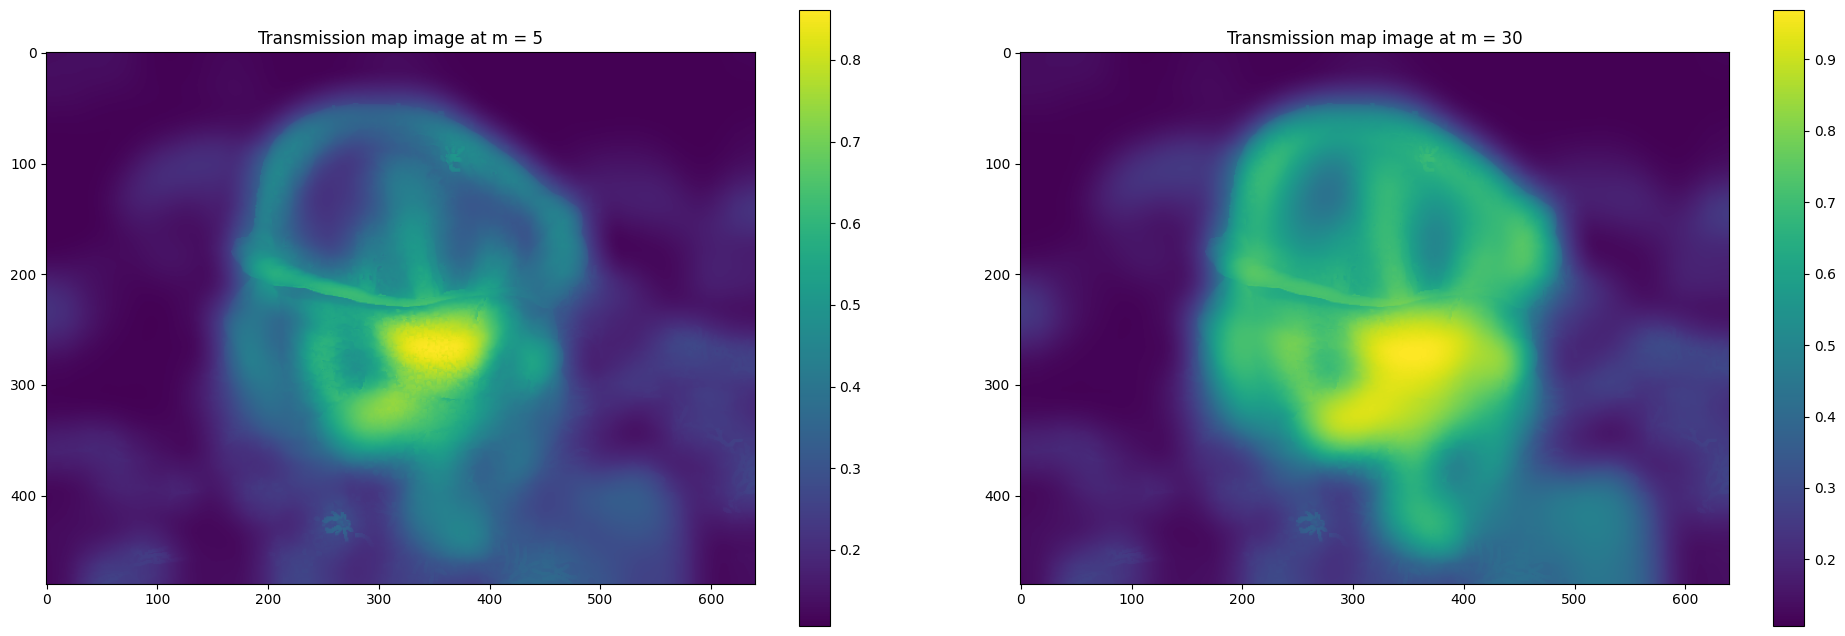

In [16]:
# p = transmm
# r = 16
# s = 4
# eps = 0.45
# new_width = int(x*(1/s))
# new_height = int(y*(1/s))
# new_dim = (new_height, new_width)

# I_sub = cv2.resize(p, new_dim)
# p_sub = cv2.resize(p, new_dim)
# r_sub = int(r / s)

# hei,wei = I_sub.shape
# I_temp = np.ones((hei,wei))

r = 16
s = 4
eps = 0.45
p1 = transmm_5
p2 = transmm_30

new_width = int(x*(1/s))
new_height = int(y*(1/s))
new_dim = (new_height, new_width)

I_sub_5 = cv2.resize(p1, new_dim)
p_sub_5 = cv2.resize(p1, new_dim)
r_sub_5 = int(r / s)
I_sub_30 = cv2.resize(p2, new_dim)
p_sub_30 = cv2.resize(p2, new_dim)
r_sub_30 = int(r / s)

hei_5,wei_5 = I_sub_5.shape
I_temp_5 = np.ones((hei_5,wei_5))
hei_30,wei_30 = I_sub_30.shape
I_temp_30 = np.ones((hei_30,wei_30))

def boxfilter(imSrc, r):
    
    hei, wid = imSrc.shape
    imDst = np.zeros_like(imSrc)

    # cumulative sum over Y axis
    imCum = np.cumsum(imSrc, axis=0)
    
    # difference over Y axis
    imDst[0:r+1, :] = imCum[r:2*r+1, :]
    imDst[r+1:hei-r, :] = imCum[2*r+1:hei, :] - imCum[0:hei-2*r-1, :]
    imDst[hei-r:hei, :] = np.tile(imCum[hei-1, :], (r, 1)) - imCum[hei-2*r-1:hei-r-1, :]
    
    # cumulative sum over X axis
    imCum = np.cumsum(imDst, axis=1)
    
    # difference over X axis
    imDst[:, 0:r+1] = imCum[:, r:2*r+1]
    imDst[:, r+1:wid-r] = imCum[:, 2*r+1:wid] - imCum[:, 0:wid-2*r-1]
    imDst[:, wid-r:wid] = np.tile(imCum[:, wid-1], (r, 1)).T - imCum[:, wid-2*r-1:wid-r-1]
    
    return imDst

N_5 = boxfilter(I_temp_5,r_sub_5)
N_30 = boxfilter(I_temp_30,r_sub_30)
# print(N)

# mean_I = boxfilter(I_sub, r_sub) / N
# mean_p = boxfilter(p_sub, r_sub) / N
# mean_Ip = boxfilter(I_sub*p_sub, r_sub) / N
# cov_Ip = mean_Ip - mean_I * mean_p

# mean_II = boxfilter(I_sub*I_sub, r_sub) / N
# var_I = mean_II - mean_I * mean_I
# a = cov_Ip / (var_I + eps)
# b = mean_p - a * mean_I

# mean_a = boxfilter(a, r_sub) / N
# mean_b = boxfilter(b, r_sub) / N

# mean_a = cv2.resize(mean_a, (p.shape[1], p.shape[0]), interpolation=cv2.INTER_LINEAR)
# mean_b = cv2.resize(mean_b, (p.shape[1], p.shape[0]), interpolation=cv2.INTER_LINEAR)

# q = mean_a * p + mean_b

# tmd = q

def final_transmap(I_sub, p_sub, r_sub, p, eps, N):
    mean_I = boxfilter(I_sub, r_sub) / N
    mean_p = boxfilter(p_sub, r_sub) / N
    mean_Ip = boxfilter(I_sub*p_sub, r_sub) / N
    cov_Ip = mean_Ip - mean_I * mean_p

    mean_II = boxfilter(I_sub*I_sub, r_sub) / N
    var_I = mean_II - mean_I * mean_I
    a = cov_Ip / (var_I + eps)
    b = mean_p - a * mean_I

    mean_a = boxfilter(a, r_sub) / N
    mean_b = boxfilter(b, r_sub) / N

    mean_a = cv2.resize(mean_a, (p.shape[1], p.shape[0]), interpolation=cv2.INTER_LINEAR)
    mean_b = cv2.resize(mean_b, (p.shape[1], p.shape[0]), interpolation=cv2.INTER_LINEAR)

    q = mean_a * p + mean_b
    return q

q_5 = final_transmap(I_sub_5, p_sub_5, r_sub_5, p1, eps, N_5)
q_30 = final_transmap(I_sub_30, p_sub_30, r_sub_30, p1, eps, N_30)


print("transmission map at m = 5")
print(q_5)
print("transmission map at m = 30")
print(q_30)

# plt.figure(figsize = (20,8))
# plt = pltImg(q_5,title="Transmission map image at m = 5", ori='vertical')
print("transmission map final plot")
plt.figure(figsize = (24,8))
plt.subplot(1, 2, 1)
plt = pltImg(q_5,title="Transmission map image at m = 5", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(q_30,title="Transmission map image at m = 30", ori='vertical')
plt.subplots_adjust(wspace=0.1)

##7th step: Recovering the radiance(haze-less version of the image)
* loop throught the image to recover its radiance (haze-less version)
* subtract the original pixel value by the atm. light
* divide the result by the max of (tmap(x,y0 , t0))
* sum the result with the atm. light

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-34.643522112240994..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.748594178757609..1.0].


haze-less image at m = 5
[[[-0.00769315 -0.00769326  0.06378123]
  [ 0.02794566  0.02794555  0.09942004]
  [ 0.02774811  0.02774799  0.09922248]
  ...
  [ 0.39448926  0.01449694  0.19182647]
  [ 0.39447459  0.01446075  0.19180032]
  [ 0.36913571 -0.01089218  0.16645395]]

 [[-0.00776427 -0.00776439  0.06371011]
  [ 0.0278745   0.02787438  0.09934887]
  [ 0.02767686  0.02767674  0.09915124]
  ...
  [ 0.34392165  0.01459495  0.19192448]
  [ 0.3692389  -0.01077494  0.16656463]
  [ 0.31856418 -0.01079335  0.16655278]]

 [[-0.00790477 -0.00790489  0.06356961]
  [ 0.02773391  0.02773379  0.09920829]
  [ 0.027538    0.02753788  0.09901747]
  ...
  [ 0.28084828 -0.01114134  0.14812548]
  [ 0.30022674 -0.01087248  0.1446769 ]
  [ 0.27428393 -0.01089037  0.14465901]]

 ...

 [[ 0.46244001  0.46243973  0.27865832]
  [ 0.46241817  0.46241789  0.27863648]
  [ 0.43930649  0.41633855  0.30149999]
  ...
  [ 0.06155237 -0.08794464 -0.08794577]
  [ 0.06169025 -0.08780677 -0.0878079 ]
  [ 0.06175951 -0.0

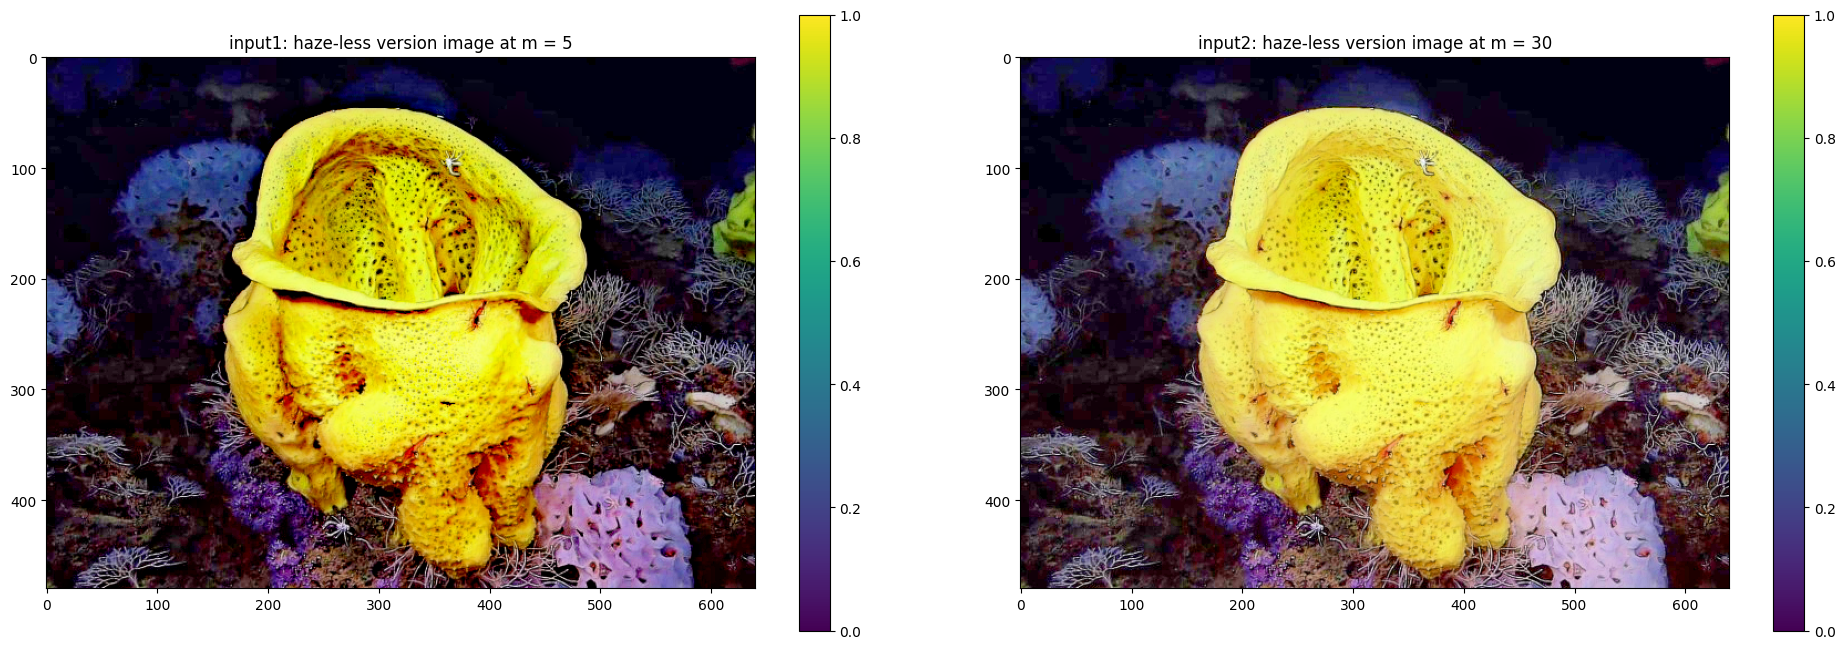

In [17]:
t0 = 0.02
J = np.zeros((x,y,3))
a_r = np.zeros((x,y))
a_g = np.zeros((x,y))
a_b = np.zeros((x,y))


img_single = A.astype('float32')
img_single /= 255.0

a_r = img_single[:,:,0]
a_g = img_single[:,:,1]
a_b = img_single[:,:,2]

# atm_lighting = atmLightImageFilt_m5
# atm_lighting = atm_lighting/255

# for i in range(x):
#     for j in range(y):
        
#         diff = (a_r[i, j] - atm_lighting[i, j, 0])  # subtract the atmospheric light
#         tmax = max(transmm[i, j], t0)  # calculate max of tmap and t0
#         J[i, j, 0] = diff / tmax + atm_lighting[i, j, 0]  # recover radiance

#         diff = (a_g[i, j] - atm_lighting[i, j, 1])  # subtract the atmospheric light
#         tmax = max(transmm[i, j], t0)  # calculate max of tmap and t0
#         J[i, j, 1] = diff / tmax + atm_lighting[i, j, 1]  # recover radiance

#         diff = (a_b[i, j] - atm_lighting[i, j, 2])  # subtract the atmospheric light
#         tmax = max(transmm[i, j], t0)  # calculate max of tmap and t0
#         J[i, j, 2] = diff / tmax + atm_lighting[i, j, 2]  # recover radiance

# print(J)
# J= 1 - J


def rad_recover(J,atmLightImageFilt,transmm,a_r,a_g,a_b,t0,x,y):
    atm_lighting = atmLightImageFilt
    atm_lighting = atm_lighting/255

    # loop through the image to recover its radiance (haze-less version)
    for i in range(x):
        for j in range(y):
            
            diff = (a_r[i, j] - atm_lighting[i, j, 0])  # subtract the atmospheric light
            tmax = max(transmm[i, j], t0)  # calculate max of tmap and t0
            J[i, j, 0] = diff / tmax + atm_lighting[i, j, 0]  # recover radiance

            diff = (a_g[i, j] - atm_lighting[i, j, 1])  # subtract the atmospheric light
            tmax = max(transmm[i, j], t0)  # calculate max of tmap and t0
            J[i, j, 1] = diff / tmax + atm_lighting[i, j, 1]  # recover radiance

            diff = (a_b[i, j] - atm_lighting[i, j, 2])  # subtract the atmospheric light
            tmax = max(transmm[i, j], t0)  # calculate max of tmap and t0
            J[i, j, 2] = diff / tmax + atm_lighting[i, j, 2]  # recover radiance

    J= 1 - J
    return J

input1 = rad_recover(J,atmLightImageFilt_m5,transmm_5,a_r,a_g,a_b,t0 ,x,y)
input2 = rad_recover(J,atmLightImageFilt_m30,transmm_30,a_r,a_g,a_b,t0 ,x,y)


print("haze-less image at m = 5")
print(input1)
print("haze-less image at m = 30")
print(input2)
print("haze-less version plot")
plt.figure(figsize = (24,8))
plt.subplot(1, 2, 1)
plt = pltImg(input1,title="input1: haze-less version image at m = 5", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(input2,title="input2: haze-less version image at m = 30", ori='vertical')
plt.subplots_adjust(wspace=0.1)

##8th step: Calculate the weight maps and perform multi-scale fusion
* Saliency weight map calculated using the Achantay method
* Luminance WM
* Contrast WM = absolute value of a laplacian filtering on the luminance (which is the mean of R,G,B)
* aggregate and normalize the WMs using a regularization term
* laplacianKernel is given in the article as [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]/8

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [4.6640635e-06..11.8556795].


[[0.18262936 0.1737938  0.1753482  ... 0.1096919  0.11335118 0.11995536]
 [0.18269946 0.17386368 0.17541692 ... 0.12087868 0.12341227 0.12823847]
 [0.18144102 0.1731632  0.1746279  ... 0.1364857  0.1382308  0.14126843]
 ...
 [0.17175354 0.16407542 0.1424822  ... 0.28059095 0.2804506  0.2803813 ]
 [0.176439   0.16309376 0.12811632 ... 0.28047937 0.28034297 0.28027543]
 [0.16858344 0.1568005  0.12095575 ... 0.28042424 0.28028974 0.28022313]]
[[0.320451   0.31158754 0.31291717 ... 0.24531671 0.2489647  0.25548768]
 [0.32045105 0.31158757 0.31291717 ... 0.25629997 0.25886613 0.2636509 ]
 [0.3190659  0.3107565  0.31200323 ... 0.2714895  0.27330402 0.27634376]
 ...
 [0.03883031 0.03120792 0.00996801 ... 0.36297953 0.36301672 0.36303574]
 [0.04308233 0.02998731 0.00413477 ... 0.36301646 0.3630538  0.3630728 ]
 [0.03528312 0.02373222 0.01111349 ... 0.3630355  0.363073   0.36309206]]


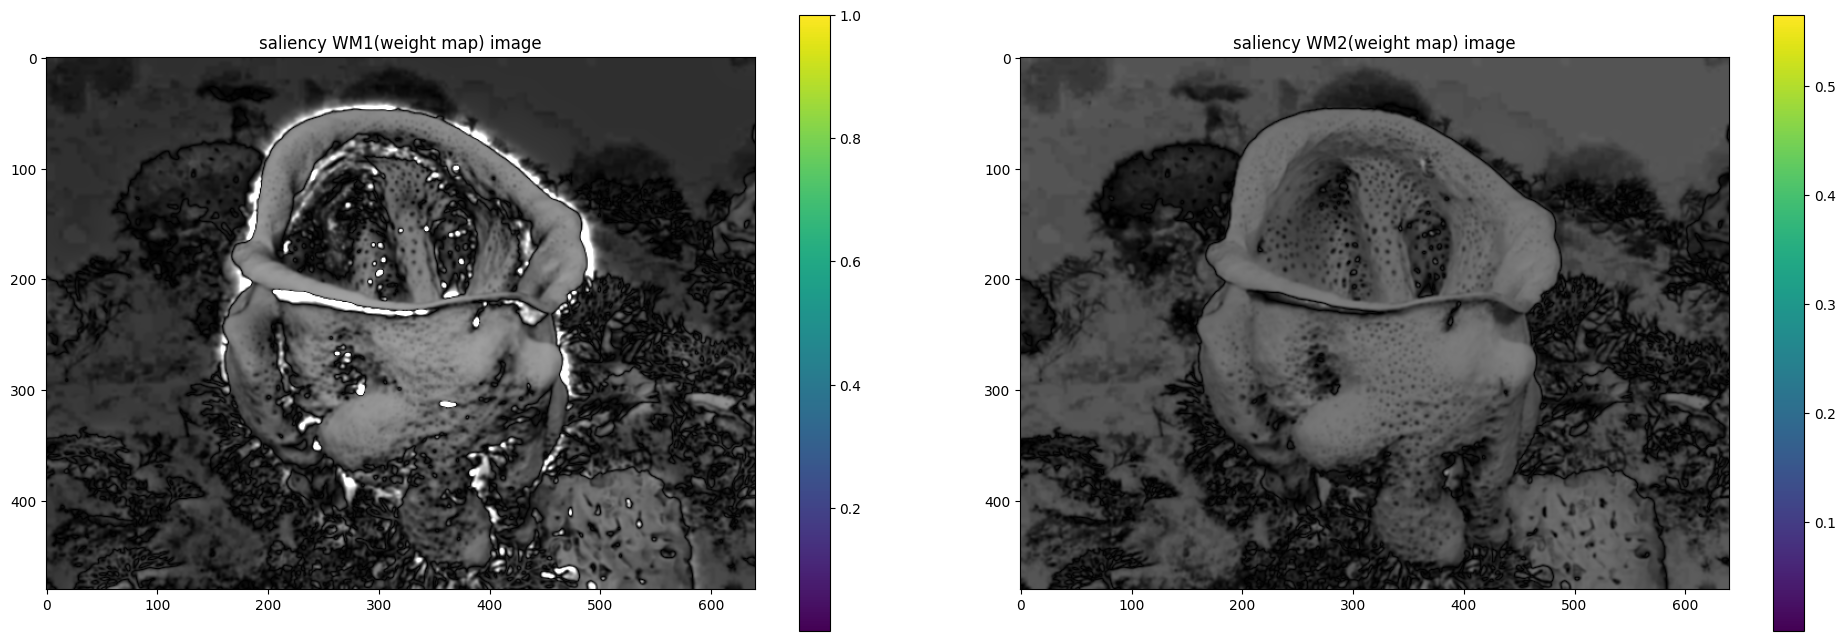

In [18]:
def saliencyWM(input):
    # create a 5x5 separable binomial kernel with high frequency cut-off of pi/2.75 
    a = np.array([1, 4, 6, 4, 1])/16
    Gkernel = np.outer(a, a)

    # the image has to be of type float
    if input.dtype != 'float32':
        input = input.astype('float32')

    # calculate a Gaussian-smoothed version of the image by applying the Gaussian filter
    oneC = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)
    meank = np.mean(oneC)
    gaussianSmoothed = cv2.filter2D(oneC, -1, Gkernel, borderType=cv2.BORDER_REFLECT)
    out = np.abs(gaussianSmoothed - meank) 

    return out
    
saliencyWM1 = saliencyWM(input1)
saliencyWM2 = saliencyWM(input2)
saliency_img1 = cv2.cvtColor(saliencyWM1, cv2.COLOR_RGBA2RGB)
saliency_img2 = cv2.cvtColor(saliencyWM2, cv2.COLOR_RGBA2RGB)
print(saliencyWM1)
print(saliencyWM2)
# print(saliencyWM1[:,0])
plt.figure(figsize = (24,8))
plt.subplot(1, 2, 1)
plt = pltImg(saliency_img1,title="saliency WM1(weight map) image", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(saliency_img2,title="saliency WM2(weight map) image", ori='vertical')
plt.subplots_adjust(wspace=0.1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..13.47992].


[[0.03369337 0.03369337 0.03369337 ... 0.1552461  0.15525489 0.15526062]
 [0.03369337 0.03369337 0.03369337 ... 0.13457958 0.15525489 0.13459218]
 [0.03369337 0.03369337 0.03369577 ... 0.11936834 0.12700573 0.11658217]
 ...
 [0.08663546 0.08663546 0.06028271 ... 0.07047383 0.07047383 0.07047383]
 [0.10769217 0.10769217 0.0785249  ... 0.07047383 0.07047383 0.07047383]
 [0.10769218 0.10555731 0.0785249  ... 0.07047383 0.07047383 0.07047383]]


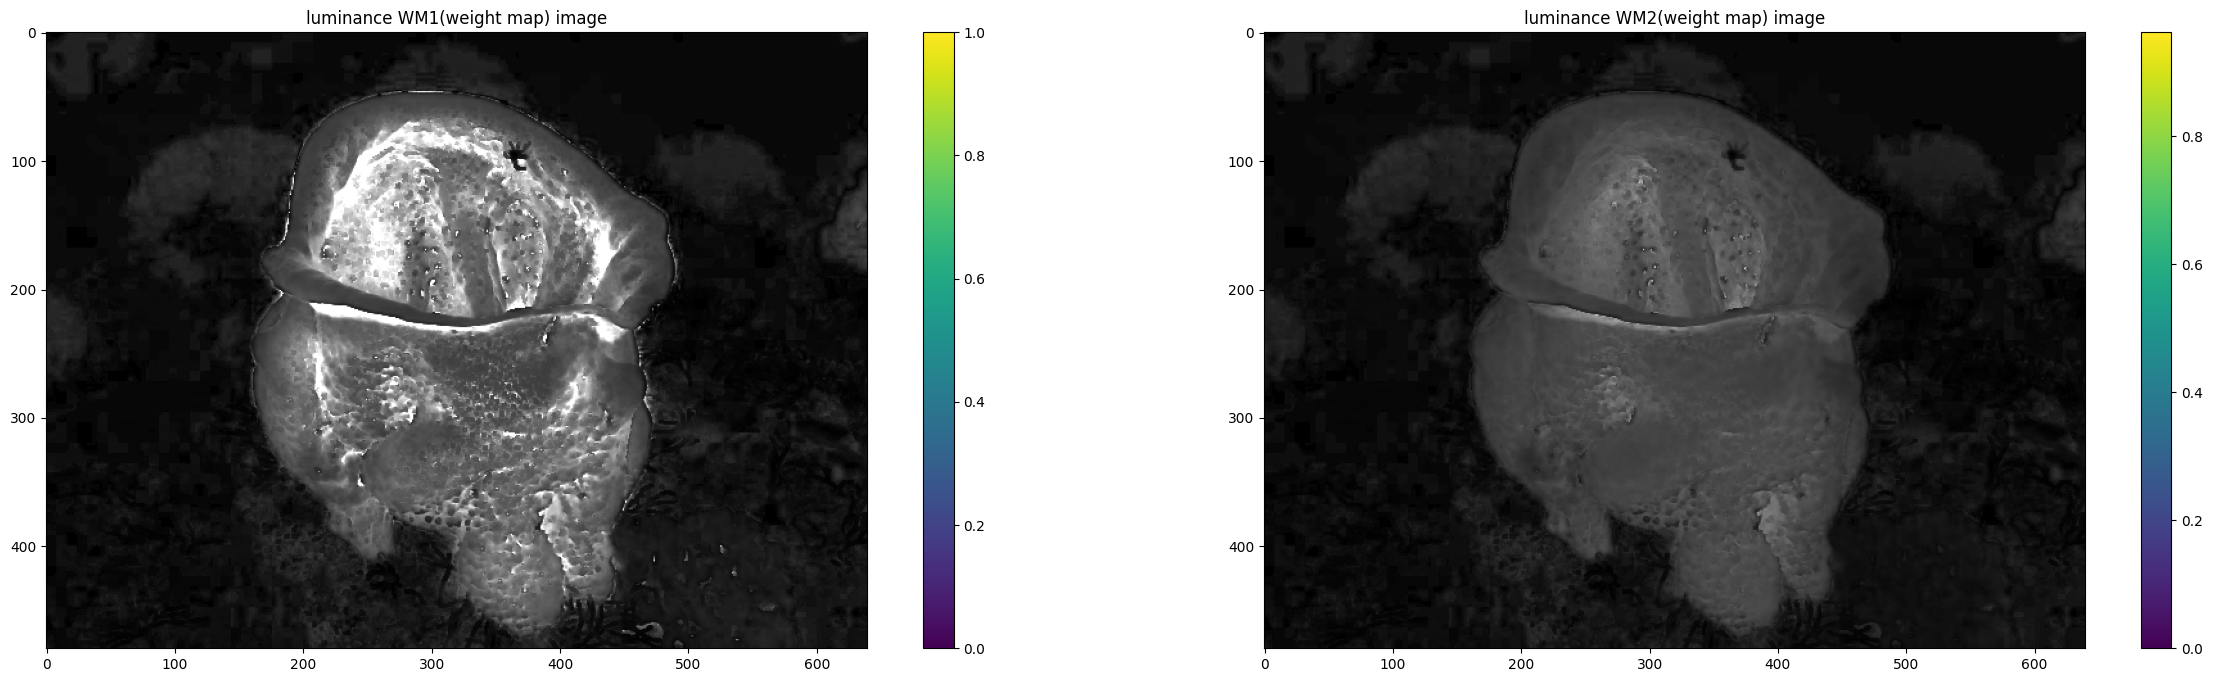

In [19]:
def luminanceWM(input):

    # calculate the luminance (mean of the three color channels)
    luminance = np.mean(input, axis=2)

    # get R, G, and B (minus luminance)
    Rl = input[:, :, 0] - luminance
    Gl = input[:, :, 1] - luminance
    Bl = input[:, :, 2] - luminance

    sum_ = ((Rl**2 + Gl**2 + Bl**2))/3
    out = np.sqrt(sum_)

    return np.array(out, dtype=np.float32)

luminanceWM1 = luminanceWM(input1)
luminanceWM2 = luminanceWM(input2)

luminanceWM_img1 = cv2.cvtColor(luminanceWM1, cv2.COLOR_RGBA2RGB)
luminanceWM_img2 = cv2.cvtColor(luminanceWM2, cv2.COLOR_RGBA2RGB)
print(luminanceWM1)
# print(luminanceWM1[:,0])
# luminanceWM_img1 = cv2.cvtColor(luminanceWM1, cv2.COLOR_RGBA2RGB)
# plt.figure(figsize = (20,8))
# plt = pltImg(luminanceWM_img1,title="saliency (weight map)WM1 image", ori='vertical')
plt.figure(figsize = (30,8))
plt.subplot(1, 2, 1)
plt = pltImg(luminanceWM_img1,title="luminance WM1(weight map) image", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(luminanceWM_img2,title="luminance WM2(weight map) image", ori='vertical')
plt.subplots_adjust(wspace=0.1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..18.43068].


[[1.33378766e-02 1.34653291e-02 1.34657295e-02 ... 1.05072325e-02
  1.68473367e-02 2.15248857e-03]
 [1.33385174e-02 1.34642394e-02 1.34646399e-02 ... 1.33920005e-02
  7.88758695e-03 4.37626196e-03]
 [1.33404536e-02 1.34611074e-02 1.34656755e-02 ... 6.45795232e-03
  3.17530823e-03 2.83065106e-04]
 ...
 [2.63042003e-02 3.24205719e-02 3.54903676e-02 ... 4.67007012e-05
  4.67732207e-05 4.67117643e-05]
 [7.67781632e-04 1.36267748e-02 4.53828126e-02 ... 4.52055028e-05
  4.51953056e-05 4.50905827e-05]
 [3.18303779e-02 4.61333618e-02 2.30745412e-02 ... 4.44187754e-05
  4.43650897e-05 4.42376586e-05]]


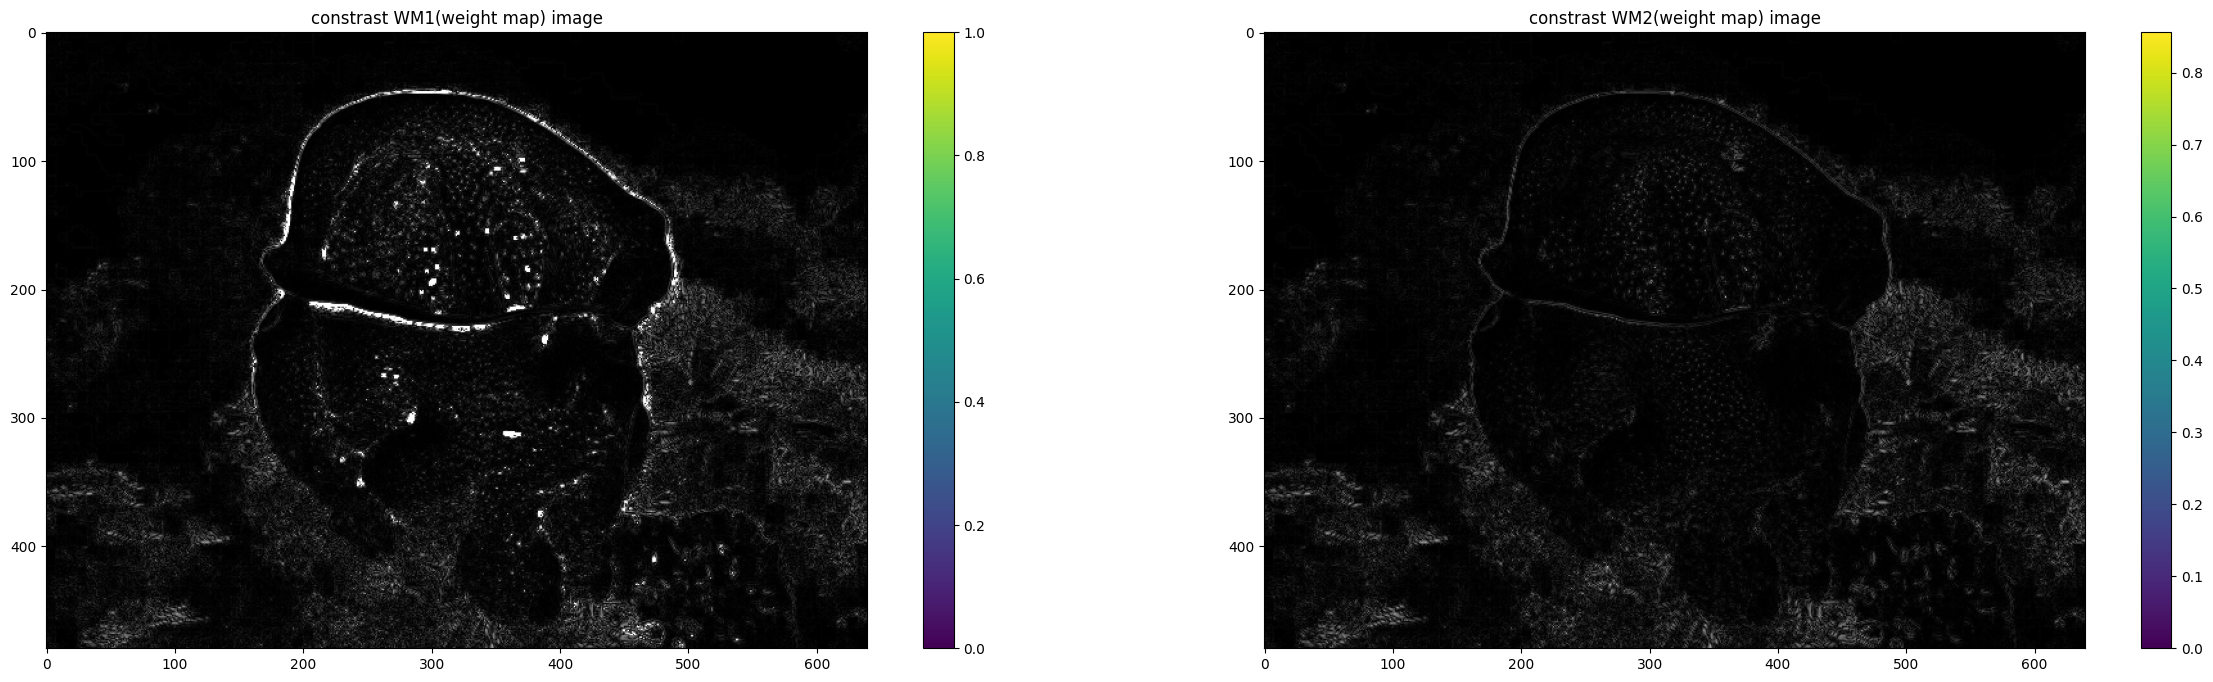

In [20]:
laplacianKernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], dtype=np.float32)/8

def contrastWM(input, laplacianKernel):

    # calculate the luminance (mean of the three color channels)
    luminance = np.mean(input, axis=2)

    # apply a laplacian kernel to filter the image and highlight intensity changes
    out = np.abs(cv2.filter2D(luminance, -1, laplacianKernel, borderType=cv2.BORDER_REFLECT))

    return np.array(out, dtype=np.float32)

contrastWM1 = contrastWM(input1, laplacianKernel)
contrastWM2 = contrastWM(input2, laplacianKernel)
print(contrastWM1)
contrastWM1_img1 = cv2.cvtColor(contrastWM1, cv2.COLOR_RGBA2RGB)
contrastWM2_img2 = cv2.cvtColor(contrastWM2, cv2.COLOR_RGBA2RGB)

plt.figure(figsize = (30,8))
plt.subplot(1, 2, 1)
plt = pltImg(contrastWM1_img1,title="constrast WM1(weight map) image", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(contrastWM2_img2,title="constrast WM2(weight map) image", ori='vertical')
plt.subplots_adjust(wspace=0.1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-33.70757095505963..1.0610834839207532].


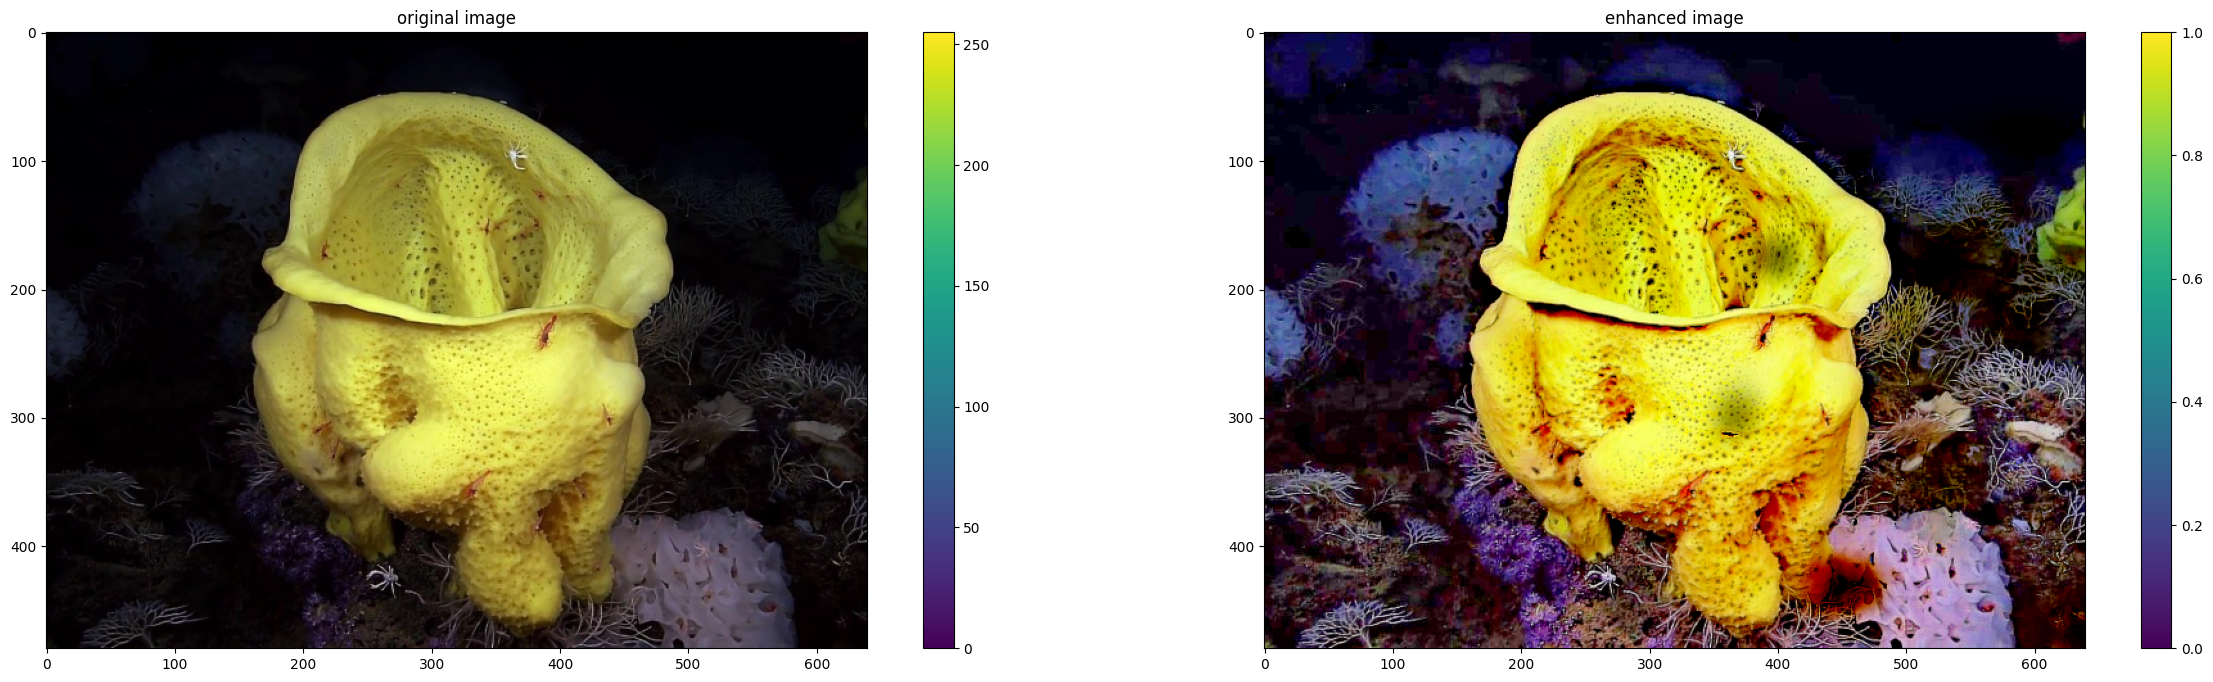

In [22]:
from math import log2, floor

# a term that guarantees that each input contributes to the multi-scale fusion output  
regTerm = 0.001 
pyramidLevels = 5
# 1/0 = display/don't display the partial results 
display_multiFusion = 1

aggregatedWM1 = (saliencyWM1 + luminanceWM1 + contrastWM1)+regTerm
aggregatedWM2 = (saliencyWM2 + luminanceWM2 + contrastWM2)+regTerm 

sum = (aggregatedWM1 + aggregatedWM2) + (2*regTerm)

normalizedWM1 = aggregatedWM1/sum
normalizedWM2 = aggregatedWM2/sum




def multiresolutionPyramid(A, num_levels=None):
    A = np.double(A)
    #M, N = A.shape
    M, N = A.shape[:2]

    num_levels = min(num_levels, min(floor(log2(M)), floor(log2(N))) + 2)
    mrp = [None] * num_levels
    smallest_size = [M, N]
    divisor = 2 ** (num_levels - 1)
    smallest_size = [int(smallest_size // divisor) for smallest_size in smallest_size]
    smallest_size = np.ceil(smallest_size)
    padded_size = smallest_size * 2 ** (num_levels - 1)
    # smallest_size = np.ceil([M, N] / 2 ** (num_levels - 1))
    Ap = cv2.copyMakeBorder(A, 0, int(padded_size[0] - M), 0, int(padded_size[1] - N), cv2.BORDER_REPLICATE)
    mrp[0] = Ap

    for k in range(1, num_levels):
        size = (int(smallest_size[1] * 2 ** (k - 1)), int(smallest_size[0] * 2 ** (k - 1)))
        mrp[k] = cv2.resize(mrp[k - 1], size, interpolation=cv2.INTER_LANCZOS4)

    mrp[0] = A
    result = [mrp[0],mrp[4],mrp[3],mrp[2],mrp[1]]
    return result

def laplacianPyramid(mrp):
    lapp = [None] * len(mrp)
    num_levels = len(mrp)
    lapp[num_levels-1] = mrp[num_levels-1]
    
    for k in range(num_levels-1):
        A = mrp[k]
        B = cv2.resize(mrp[k+1], (2*A.shape[1], 2*A.shape[0]), interpolation=cv2.INTER_LANCZOS4)
        lapp[k] = A - B[:A.shape[0], :A.shape[1], :]
        
    return lapp

def reconstructFromLaplacianPyramid(lapp):
    num_levels = len(lapp)
    out = lapp[num_levels-1]
    
    for k in range(num_levels-2, -1, -1):
        out = cv2.resize(out, (2*lapp[k].shape[1], 2*lapp[k].shape[0]), interpolation=cv2.INTER_LANCZOS4)
        g = lapp[k]
        out = out[:g.shape[0], :g.shape[1], :] + g
        
    return out

gaussPyramid1 = multiresolutionPyramid(normalizedWM1, pyramidLevels)
gaussPyramid2 = multiresolutionPyramid(normalizedWM2,pyramidLevels);

mrp1 = multiresolutionPyramid(input1,pyramidLevels);
mrp2 = multiresolutionPyramid(input2,pyramidLevels);

lapp1 = laplacianPyramid(mrp1)
lapp2 = laplacianPyramid(mrp2)

fusedPyramid = [None] * pyramidLevels

for i in range(pyramidLevels):
    # check if sizes of pyramids match
    if not gaussPyramid1[i].shape[:2] == lapp1[i].shape[:2]:
        print(f"Different sizes in level {i+1} of the pyramid. Check its construction.")
    
    # calculate fused pyramid
    fusedPyramid[i] = gaussPyramid1[i][:,:,np.newaxis] * lapp1[i] + gaussPyramid2[i][:,:,np.newaxis] * lapp2[i]
    
result = reconstructFromLaplacianPyramid(fusedPyramid)

plt.figure(figsize = (30,8))
plt.subplot(1, 2, 1)
plt = pltImg(img2,title="original image", ori='vertical')
plt.subplot(1, 2, 2)
plt = pltImg(result,title="enhanced image", ori='vertical')
plt.subplots_adjust(wspace=0.1)